In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab
print(os.getcwd())


with open ('lossesavg/adam', 'rb') as fp:
    adam = pickle.load(fp)
nb_epochs = len(adam)
with open ('lossesavg/bbb', 'rb') as fp:
    bbb = pickle.load(fp)
with open ('lossesavg/momentum', 'rb') as fp:
    momentum = pickle.load(fp)
with open ('lossesavg/sag', 'rb') as fp:
    sag = pickle.load(fp)
with open ('lossesavg/misso', 'rb') as fp:
    misso = pickle.load(fp)

/Users/karimimohammedbelhal/Documents/GitHub/AccelerationTrainingAlgorithms/MISSO/src/BNN/BayesianLeNet


''

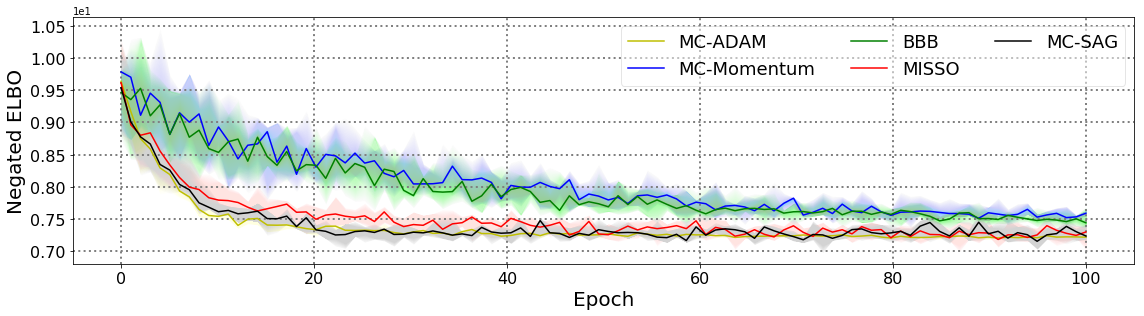

In [6]:
def tsplotseveral(x, y, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','g','r','black']
    #colors=['y','b','g','r','black']
    colors=['lightyellow','lightskyblue','palegreen','mistyrose','lightgrey']
    labels= ['MC-ADAM','MC-Momentum','BBB','MISSO','MC-SAG']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4.5))
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=18,fancybox=True, loc=0,ncol=3)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Negated ELBO', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    fig.savefig("bnn_avg_2.png",bbox_inches = 'tight')
    return _

epochs = 100
nbep = np.linspace(0,epochs,epochs)
tsplotseveral(nbep,[adam, momentum,bbb,misso,sag], n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')